In [1]:
import numpy as np                  
import pandas as pd                
import matplotlib.pyplot as plt    
import seaborn as sns
import mysql.connector
from mysql.connector import Error
import os

In [2]:
BASE_DIR = os.getcwd()

csv_path = os.path.join(BASE_DIR, '..', 'Data', 'RRHH - 16062025.csv') # -- cambiar solo la fecha del fichero 

df_RRHH = pd.read_csv(csv_path)

df_RRHH

ID  Reason_absence  Month_absence  Day_week  Seasons  \
0      1               0              3         5        4   
1      1               1              5         2        4   
2      1               7              4         6        4   
3      1              11              7         3        1   
4      1              13              1         3        3   
..   ...             ...            ...       ...      ...   
835  132              13              6         6        1   
836  133              18              1         3        3   
837  134               0             10         6        2   
838  135              23              2         3        3   
839  136              28              8         3        1   

     Transportation_expense  Distance_Residence_Work  Service_time  Age  \
0                       235                       11            14   37   
1                       235                       11            14   37   
2                       235                       11            14   37   
3                       235                       11            14   37   
4                       235                       11            14   37   
..                      ...                      ...           ...  ...   
835                     235                       11            14   37   
836                     155                       12            14   34   
837                     118                       13            18   50   
838                     225                       26             9   28   
839                     246                       25            16   41   

     Work_load_Average_day  ...  Disciplinary_failure  Education  Son  \
0                  244.387  ...                     1          3    1   
1                  246.074  ...                     0          3    1   
2                  326.452  ...                     0          3    1   
3                  264.604  ...                     0          3    1   
4                  330.061  ...                     0          3    1   
..                     ...  ...                   ...        ...  ...   
835                377.550  ...                     0          3    1   
836                313.532  ...                     0          1    2   
837                265.017  ...                     1          1    1   
838                264.249  ...                     0          1    1   
839                249.797  ...                     0          1    0   

     Social_drinker  Social_smoker  Pet  Weight  Height  Body_mass_index  \
0                 0              0    1      88     172               29   
1                 0              0    1      88     172               29   
2                 0              0    1      88     172               29   
3                 0              0    1      88     172               29   
4                 0              0    1      88     172               29   
..              ...            ...  ...     ...     ...              ...   
835               0              0    1      88     172               29   
836               1              0    0      95     196               25   
837               1              0    0      98     178               31   
838               0              0    2      69     169               24   
839               1              0    0      67     170               23   

     Absenteeism_hours  
0                    0  
1                    8  
2                    3  
3                    4  
4                    1  
..                 ...  
835                 16  
836                  8  
837                  0  
838                  3  
839                  1  

[840 rows x 21 columns]

## Perfil Sociodemográfico

- Edad (variable numérica)
- Hijos (variable numérica)
- Estudios (variable categórica)

In [3]:
sociodemografico = df_RRHH[['ID', 'Age', 'Son', 'Education']].drop_duplicates(subset='ID').reset_index(drop=True)
sociodemografico.head()

ID  Age  Son  Education
0   1   37    1          3
1   2   48    1          1
2   3   38    0          1
3   4   40    1          1
4   5   43    1          1

## Exploratory Data Analysis
* Estadísticos

In [6]:
sociodemografico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         36 non-null     int64 
 1   Age        36 non-null     int64 
 2   Son        36 non-null     int64 
 3   Education  36 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.3+ KB


* Cambio de tipo de datos

In [7]:
# Asegura que los valores de 'Son' sean enteros
sociodemografico['Son'] = pd.to_numeric(sociodemografico['Son'], errors='coerce')
sociodemografico['Son'] = sociodemografico['Son'].astype(int)


In [8]:
sociodemografico.describe()

ID        Age        Son
count  36.000000  36.000000  36.000000
mean   18.500000  38.333333   1.138889
std    10.535654   7.917431   1.018480
min     1.000000  27.000000   0.000000
25%     9.750000  32.000000   0.000000
50%    18.500000  37.500000   1.000000
75%    27.250000  43.000000   2.000000
max    36.000000  58.000000   4.000000

## Visualizaciones

* Edad
* Hijos

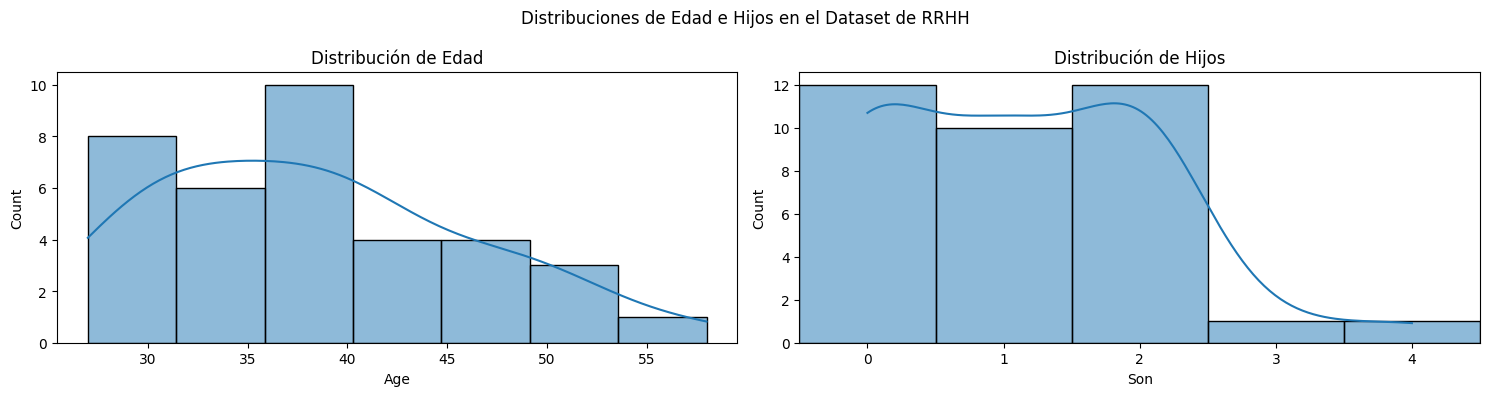

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(sociodemografico['Age'], kde=True, ax=axs[0])
axs[0].set_title("Distribución de Edad")


sns.histplot(
    sociodemografico['Son'],
    kde=True,
    ax=axs[1],
    bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]
)
axs[1].set_title("Distribución de Hijos")
axs[1].set_xticks([0, 1, 2, 3, 4])
axs[1].set_xlim(-0.5, 4.5)
plt.suptitle("Distribuciones de Edad e Hijos en el Dataset de RRHH")

plt.tight_layout()
plt.show()

Proporción de empleados agrupados en 4 rangos de edad:

El grupo más numeroso es el de 30-39 años, que representa aproximadamente el 44% del total de empleados.
El segundo grupo más grande es el de 40-49 años, con un 31% de la plantilla.
Los empleados de 20-29 años constituyen cerca del 14%.
El grupo menos representado es el de 50-59 años, con solo un 11% de los empleados.

Conclusión:
La mayoría de los empleados tienen entre 30 y 49 años, lo que indica que la plantilla es mayoritariamente adulta joven. Hay poca presencia de empleados muy jóvenes (20-29) o cercanos a la jubilación (50-59). Esto puede sugerir estabilidad y experiencia en el equipo, pero también una menor diversidad generacional.

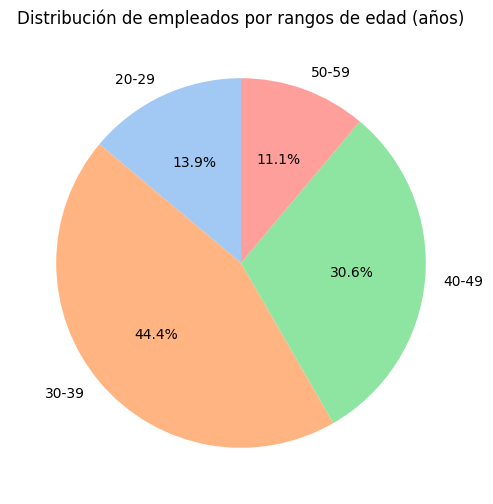

In [ ]:
age_bins = [20, 30, 40, 50, 60] 
age_labels = ['20-29', '30-39', '40-49', '50-59']
sociodemografico['Age_group'] = pd.cut(sociodemografico['Age'], bins=age_bins, labels=age_labels, right=False)

age_counts = sociodemografico['Age_group'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(
    age_counts,
    labels=age_labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel")[0:len(age_labels)]
)
plt.title("Distribución de empleados por rangos de edad (años)")
plt.show()

Proporción de empleados según la cantidad de hijos que tienen:

La mayoría de los empleados tiene 0 o 2 hijos (cada grupo representa el 33.3% del total).
Un 27.8% de los empleados tiene 1 hijo.
Solo un 2.8% tiene 3 hijos y otro 2.8% tiene 4 hijos.

Conclusión:
La mayor parte de la plantilla tiene familias pequeñas (0, 1 o 2 hijos) o no tiene hijos. Son muy pocos los empleados con familias numerosas (3 o 4 hijos). Esto sugiere que la estructura familiar predominante entre los empleados es de familias pequeñas o sin hijos.

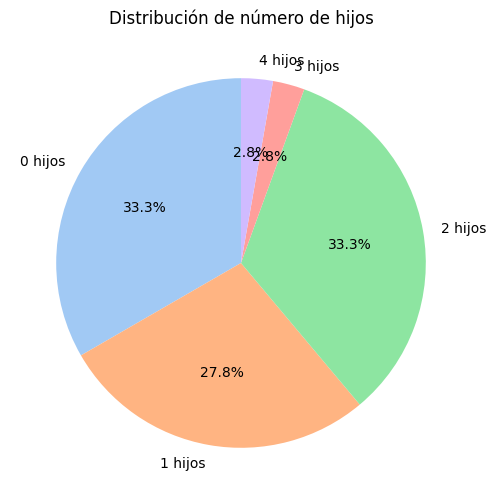

In [16]:
son_counts = sociodemografico['Son'].value_counts().sort_index()
labels = [f'{i} hijos' for i in son_counts.index]

plt.figure(figsize=(6, 6))
plt.pie(
    son_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel")[0:len(son_counts)]
)
plt.title("Distribución de número de hijos")
plt.show()

* Estudios

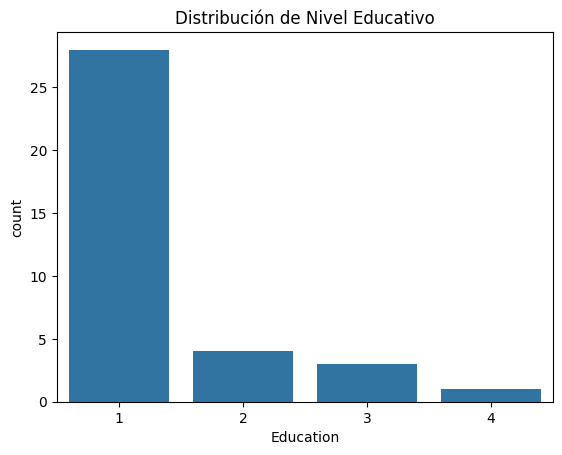

In [12]:
sns.countplot(
    data=sociodemografico,
    x='Education',
    order=[1, 2, 3, 4]
)
plt.title("Distribución de Nivel Educativo")
plt.show()

Proporción de empleados según su nivel educativo:

La gran mayoría de los empleados (77.8%) tiene el Nivel 1 (high school), es decir, el nivel educativo más bajo registrado en el dataset.

Un 11.1% de los empleados tiene Nivel 2 (graduate).

Un 8.3% tiene Nivel 3 (postgraduate).

Solo un 2.8% de los empleados ha alcanzado el Nivel 4 (master and doctor), el nivel educativo más alto.

Conclusión:
La plantilla está compuesta principalmente por empleados con bajo nivel educativo, y solo una minoría ha alcanzado estudios de posgrado o superiores. Esto puede influir en las competencias técnicas y profesionales del equipo, así como en las oportunidades de desarrollo y promoción interna.

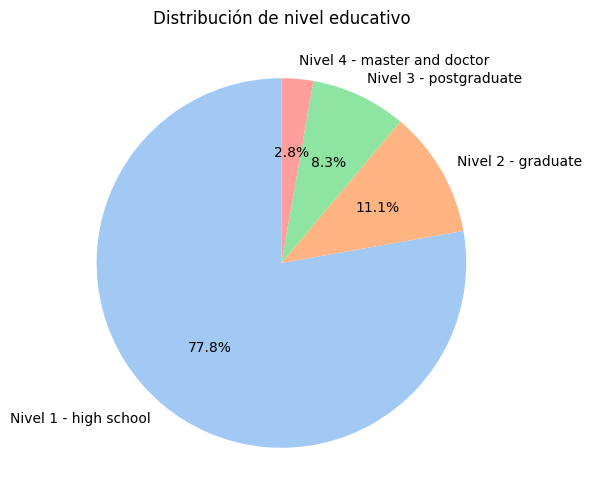

In [17]:
education_counts = sociodemografico['Education'].value_counts().sort_index()
labels = ['Nivel 1 - high school', 'Nivel 2 - graduate', 'Nivel 3 - postgraduate', 'Nivel 4 - master and doctor']  # Ajusta los nombres si tienes descripciones

plt.figure(figsize=(6, 6))
plt.pie(
    education_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel")[0:4]
)
plt.title("Distribución de nivel educativo")
plt.show()